In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from scipy.io import loadmat
from sklearn.model_selection import StratifiedKFold

In [3]:
dataBaseline = loadmat(r"C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\data\Dados12-06_Baseline.mat")
dataCincoP = loadmat(r"C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\data\Dados12-06_CincoP.mat")
dataCinquenta = loadmat(r"C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\data\Dados12-06_CinquentaP.mat")
dataDez = loadmat(r"C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\data\Dados12-06_DezP.mat")
dataVinte = loadmat(r"C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\data\Dados12-06_VinteP.mat")

In [4]:
dataBaseline = dataBaseline['Baseline']
dataCincoP = dataCincoP['CincoP']
dataCinquenta = dataCinquenta['CinquentaP']
dataDez = dataDez['DezP']
dataVinte = dataVinte['VinteP']

dadosRigidez = pd.DataFrame()

# Adicionar dataBaseline com coluna y_Baseline
dataBaseline_df = pd.DataFrame(dataBaseline)
dataBaseline_df['y_Baseline'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataBaseline_df], ignore_index=True)

# Adicionar dataCinquenta com coluna y_CinquentaP
dataCinquenta_df = pd.DataFrame(dataCinquenta)
dataCinquenta_df['y_CinquentaP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataCinquenta_df], ignore_index=True)

# Adicionar dataVinte com coluna y_VinteP
dataVinte_df = pd.DataFrame(dataVinte)
dataVinte_df['y_VinteP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataVinte_df], ignore_index=True)

# Adicionar dataDez com coluna y_DezP
dataDez_df = pd.DataFrame(dataDez)
dataDez_df['y_DezP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataDez_df], ignore_index=True)

# Adicionar dataCincoP com coluna y_CincoP
dataCincoP_df = pd.DataFrame(dataCincoP)
dataCincoP_df['y_CincoP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataCincoP_df], ignore_index=True)

In [5]:
dadosRigidez = dadosRigidez.fillna(0)

In [6]:
dadosRigidez

,0,1,2,3,4,5,6,7,8,9,...,5825,5826,5827,5828,5829,y_Baseline,y_CinquentaP,y_VinteP,y_DezP,y_CincoP
0,-0.069403,-0.063588,-0.057773,-0.062248,-0.069357,-0.072452,-0.067101,-0.061750,-0.060648,-0.060306,...,0.085381,0.084163,0.079865,0.075566,0.071582,1.0,0.0,0.0,0.0,0.0
1,-0.065044,-0.066007,-0.067060,-0.068114,-0.067683,-0.066604,-0.065766,-0.066740,-0.067714,-0.067788,...,0.092780,0.089850,0.087619,0.085389,0.084075,1.0,0.0,0.0,0.0,0.0
2,-0.046624,-0.049363,-0.052491,-0.054730,-0.056556,-0.056586,-0.054575,-0.053591,-0.055618,-0.057511,...,0.061665,0.058268,0.053236,0.048935,0.046061,1.0,0.0,0.0,0.0,0.0
3,-0.061027,-0.058349,-0.060661,-0.064186,-0.065710,-0.063378,-0.061045,-0.060809,-0.060861,-0.060462,...,0.080061,0.079631,0.072853,0.066075,0.066834,1.0,0.0,0.0,0.0,0.0
4,-0.047144,-0.048311,-0.049509,-0.050718,-0.050682,-0.049691,-0.050416,-0.053795,-0.056360,-0.056027,...,0.057691,0.055566,0.053580,0.048962,0.043175,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.051792,-0.054049,-0.056265,-0.058981,-0.061724,-0.060391,-0.058726,-0.062476,-0.066835,-0.070094,...,0.042776,0.037562,0.032460,0.028648,0.024807,0.0,0.0,0.0,0.0,1.0
2496,-0.058632,-0.059097,-0.059563,-0.057240,-0.054515,-0.052944,-0.052535,-0.052444,-0.054635,-0.056826,...,0.074497,0.072683,0.070308,0.067932,0.062855,0.0,0.0,0.0,0.0,1.0
2497,-0.047668,-0.050152,-0.052132,-0.052815,-0.053213,-0.050880,-0.048547,-0.052403,-0.056879,-0.058471,...,0.054528,0.052349,0.048552,0.044939,0.043274,0.0,0.0,0.0,0.0,1.0
2498,-0.048812,-0.047599,-0.048041,-0.049155,-0.050671,-0.052633,-0.053337,-0.049959,-0.046582,-0.052176,...,0.063047,0.058838,0.055123,0.052132,0.049206,0.0,0.0,0.0,0.0,1.0


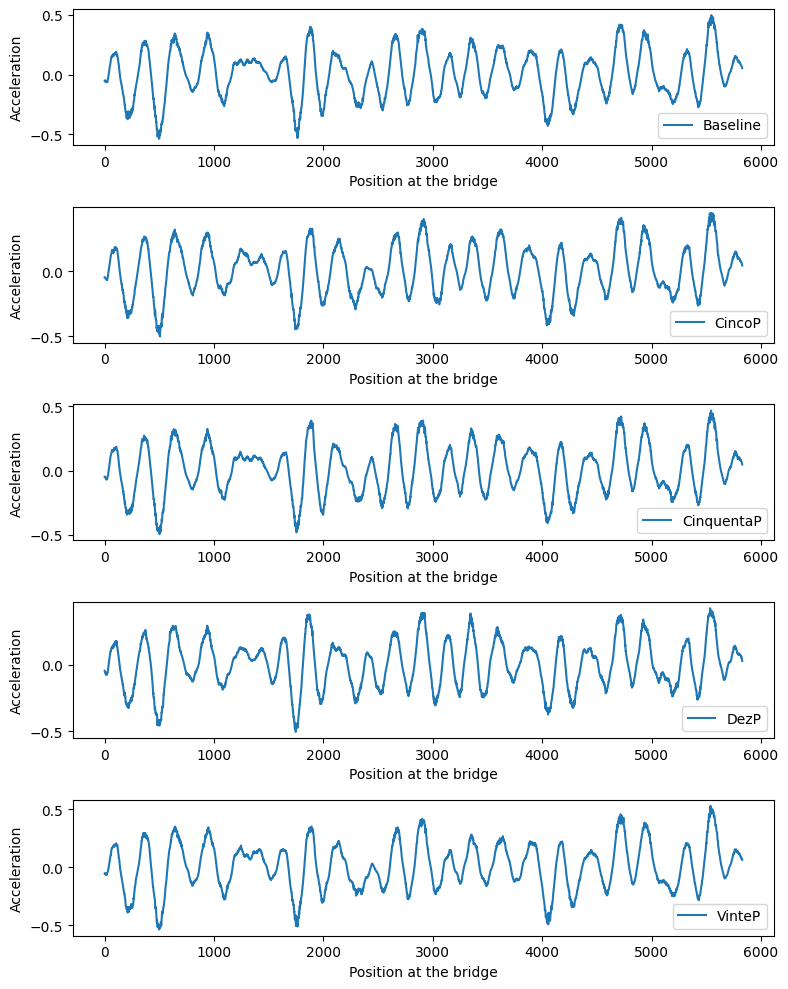

In [7]:
import matplotlib.pyplot as plt

exemplo_baseline = dadosRigidez.loc[250:250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_cinco = dadosRigidez.loc[750:750].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_cinquenta = dadosRigidez.loc[1250:1250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_dez = dadosRigidez.loc[1750:1750].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_vinte = dadosRigidez.loc[2250:2250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)

x = range(5830)  # Eixo x de 0 a 19999

fig, axs = plt.subplots(5, 1, figsize=(8, 10))  # Criação dos subplots

# Plotagem do exemplo_baseline
axs[0].plot(x, exemplo_baseline.values.flatten(), label='Baseline')
axs[0].set_xlabel('Position at the bridge')
axs[0].set_ylabel('Acceleration')
axs[0].legend()

# Plotagem do exemplo_cinquenta
axs[1].plot(x, exemplo_cinco.values.flatten(), label='CincoP')
axs[1].set_xlabel('Position at the bridge')
axs[1].set_ylabel('Acceleration')
axs[1].legend()

# Plotagem do exemplo_vinte
axs[2].plot(x, exemplo_cinquenta.values.flatten(), label='CinquentaP')
axs[2].set_xlabel('Position at the bridge')
axs[2].set_ylabel('Acceleration')
axs[2].legend()

axs[3].plot(x, exemplo_dez.values.flatten(), label='DezP')
axs[3].set_xlabel('Position at the bridge')
axs[3].set_ylabel('Acceleration')
axs[3].legend()

axs[4].plot(x, exemplo_vinte.values.flatten(), label='VinteP')
axs[4].set_xlabel('Position at the bridge')
axs[4].set_ylabel('Acceleration')
axs[4].legend()

plt.tight_layout()
plt.show()


In [8]:
x = dadosRigidez.drop(['y_Baseline', 'y_CinquentaP', 'y_VinteP','y_DezP','y_CincoP'], axis = 1)
y = pd.DataFrame().assign(Baseline=dadosRigidez['y_Baseline'], Cinquenta = dadosRigidez['y_CinquentaP'], Vinte = dadosRigidez['y_VinteP'], Dez = dadosRigidez['y_DezP'], Cinco = dadosRigidez['y_CincoP']).values

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Kclassif = KNeighborsClassifier(n_neighbors=5)
Kclassif.fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Kclassif, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}%")


Score for fold 1: 0.8775
Score for fold 2: 0.865
Score for fold 3: 0.8825
Score for fold 4: 0.88
Score for fold 5: 0.8775
Average score: 87.65%


In [11]:
from sklearn.tree import DecisionTreeClassifier

Dec = DecisionTreeClassifier().fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Dec, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}% Correto!")

Score for fold 1: 0.835
Score for fold 2: 0.8125
Score for fold 3: 0.8175
Score for fold 4: 0.8125
Score for fold 5: 0.8375
Average score: 82.3% Correto!


In [12]:
from sklearn.neighbors import KNeighborsClassifier

Kclassif = KNeighborsClassifier(n_neighbors=3)
Kclassif.fit(x_train, y_train)

print(f'The score for the train data is: {Kclassif.score(x_train,y_train)}')
print(f'The score for the test data is: {Kclassif.score(x_test,y_test)}')
print(f'Average precision:{round((Kclassif.score(x_train,y_train)+Kclassif.score(x_test,y_test))*100/2, 2)}% Errado! ')

n_testes = 5
scores = cross_val_score(Kclassif, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}% Correto!")

The score for the train data is: 0.96
The score for the test data is: 0.894
Average precision:92.7% Errado! 
Score for fold 1: 0.8825
Score for fold 2: 0.8975
Score for fold 3: 0.8975
Score for fold 4: 0.9
Score for fold 5: 0.9
Average score: 89.55% Correto!


In [13]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(5830, 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
]) 


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5828, 32)          128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2914, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2912, 64)          6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1456, 64)         0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 93184)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2 ,random_state=42)

In [16]:
history = model.fit(x_train, y_train, epochs=20, batch_size=50, validation_data=(x_val, y_val))

Epoch 1/20
32/32 [==============================] - 15s 431ms/step - loss: 1.6059 - accuracy: 0.2706 - val_loss: 1.5478 - val_accuracy: 0.3225
Epoch 2/20
32/32 [==============================] - 10s 310ms/step - loss: 1.4235 - accuracy: 0.3744 - val_loss: 1.3245 - val_accuracy: 0.4425
Epoch 3/20
32/32 [==============================] - 9s 287ms/step - loss: 1.1871 - accuracy: 0.4769 - val_loss: 1.1452 - val_accuracy: 0.3725
Epoch 4/20
32/32 [==============================] - 13s 403ms/step - loss: 1.0290 - accuracy: 0.5381 - val_loss: 1.0366 - val_accuracy: 0.5150
Epoch 5/20
32/32 [==============================] - 9s 277ms/step - loss: 0.9114 - accuracy: 0.5950 - val_loss: 0.9018 - val_accuracy: 0.6625
Epoch 6/20
32/32 [==============================] - 9s 290ms/step - loss: 0.8050 - accuracy: 0.6731 - val_loss: 0.8021 - val_accuracy: 0.6175
Epoch 7/20
32/32 [==============================] - 10s 317ms/step - loss: 0.7643 - accuracy: 0.6538 - val_loss: 0.7541 - val_accuracy: 0.8350
Ep

16/16 [==============================] - 1s 47ms/step

Accuracy: 0.9420



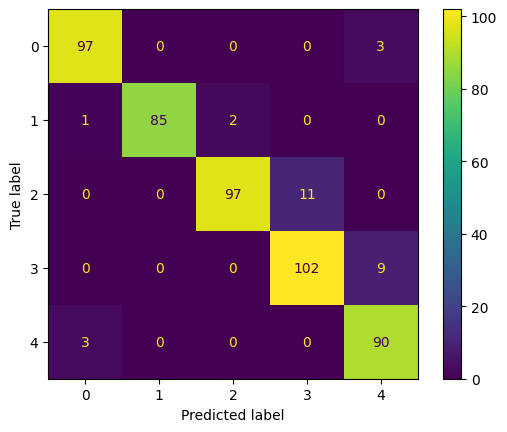

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ytestpred = model.predict(x_test)
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test.argmax(axis=1), ytestpred.argmax(axis=1))))

#Your input to confusion_matrix must be an array of int not one hot encodings.
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), ytestpred.argmax(axis=1))

In [21]:
from sklearn.metrics import roc_curve, auc

16/16 [==============================] - 1s 60ms/step


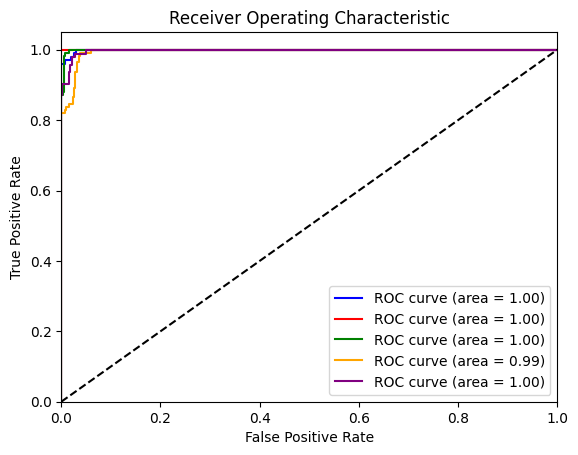

In [26]:
# Obter as probabilidades previstas do modelo
y_pred_prob = model.predict(x_test)

# Calcular a curva ROC para cada classe
fpr = {}
tpr = {}
roc_auc = {}
num_classes = 5

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adicione mais cores, se necessário

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
